In [2]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = "data.parquet"
df = pd.read_parquet(data_path)

df = df.sample(frac=0.01) # Sampling df, because whole df would take too much time to compute

In [3]:
features = df[
    ["block_number", "transferred_value", "fee"]
].values

In [4]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [46]:
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

oc_svm = OneClassSVM(kernel="rbf", gamma=1, nu=0.05)
oc_svm.fit(X_train)

OneClassSVM(gamma=1, nu=0.05)

In [47]:
# 1 for inliers, -1 for outliers
predictions = oc_svm.predict(features_scaled)

df["predictions"] = predictions

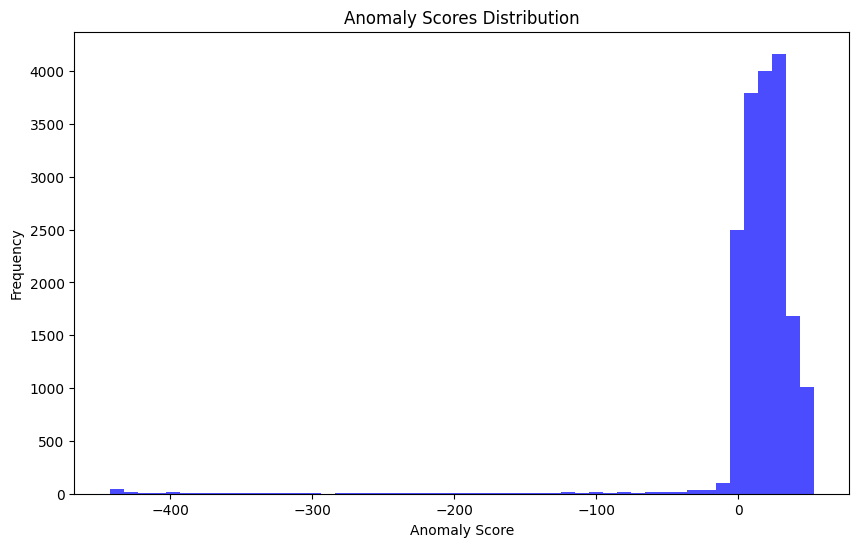

In [48]:
# Simple model evaluation: when two separated groups can be observed, probably our model works fine

# Get the anomaly scores for each point in the dataset
scores = oc_svm.decision_function(X_test)

# Visualize the anomaly scores distribution
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, alpha=0.7, color='blue')
plt.title("Anomaly Scores Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

In [49]:
df.to_csv("output_with_predictions.csv", index=False)